In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!ls /content/drive/My\ Drive

'AI prestentation.gdoc'			     predictions_plot.png
 Classroom				    'Project proposal.gdoc'
'Colab Notebooks'			     reviews.txt
 df1_meta.csv				     Singh_nupur.pdf
'Fake Postings.csv'			     Sleep_health_and_lifestyle_dataset.csv
'Fendous  blood group detection app.gdoc'   'spam (1).csv'
'Fendous@ detection of phishing mail.gdoc'   test.csv
'kaggle (5).json'			     tmdb_5000_movies1.csv
'LISTEN TO YOUR HEART.gslides'		     train.csv
 movie_metadata.csv			    'Untitled document (1).gdoc'
 movies_metadata.csv			    'Untitled document.gdoc'
 new.csv				     val.csv
 Nupur_Project_ppt.pptx			     YoutubeCommentsDataSet.csv


In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
## Tensor flow and Keras imports
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
## NLTK imports
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [ ]:
csv_path = "/content/drive/My Drive/YoutubeCommentsDataSet.csv"
df = pd.read_csv(csv_path)

In [ ]:
df.head(4)

,Comment,Sentiment
0,lets not forget that apple pay in 2014 require...,neutral
1,here in nz 50 of retailers don’t even have con...,negative
2,i will forever acknowledge this channel with t...,positive
3,whenever i go to a place that doesn’t take app...,negative


In [ ]:
df.columns

Index(['Comment', 'Sentiment'], dtype='object')

In [ ]:
## Test Cleaning:


In [ ]:
## Function to clean the text:
def clean_text(text):
  if not isinstance(text,str):
    return ""
  text = re.sub(r"http/S+","",text)
  text = re.sub(r"@/W+","",text)
  text = re.sub(r"[^a-zA-Záéíóúãõàâêôãç]","",text)
  text = text.lower()
  return text

df["Comment"]= df["Comment"].apply(clean_text)

In [ ]:
df.head(3)

,Comment,Sentiment
0,letsnotforgetthatapplepayinrequiredabrandnewip...,neutral
1,hereinnzofretailersdontevenhavecontactlesscred...,negative
2,iwillforeveracknowledgethischannelwiththehelpo...,positive


In [ ]:
df["Sentiment"].unique()

array(['neutral', 'negative', 'positive'], dtype=object)

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

# Set NLTK data path explicitly (if needed)
nltk.data.path.append("/root/nltk_data")

# Function to tokenize and remove stopwords
def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.lower() not in stopwords.words("english")]
    return tokens
df["tokenized_comment"] = df["Comment"].apply(tokenize_and_remove_stopwords)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
## Train-Test Split:
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(df["tokenized_comment"])
sequences = tokenizer.texts_to_sequences(df["tokenized_comment"])
x = pad_sequences(sequences,padding="post",maxlen=100)

In [ ]:
sentiment_map = {"positive":1,"negative":0,"neutral":2}
df["encoded_sentiment"] = df["Sentiment"].map(sentiment_map)
y = np.array(df["encoded_sentiment"])

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
##Building the LSTM Model:
model= Sequential()
model.add(Embedding(input_dim=1000,output_dim=100,input_length=x_train.shape[1]))
model.add(LSTM(units=128,return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(units=3,activation= "softmax"))
model.compile(loss="sparse_categorical_crossentropy",optimizer=Adam(learning_rate=0.001),metrics=["accuracy"])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
## Training the model:
history = model.fit(x_train,y_train,epochs = 50,batch_size = 64,validation_data=(x_test,y_test) )

Epoch 1/50
231/231 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.6222 - loss: 0.9206 - val_accuracy: 0.6165 - val_loss: 0.9135
Epoch 2/50
231/231 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6269 - loss: 0.9036 - val_accuracy: 0.6165 - val_loss: 0.9139
Epoch 3/50
231/231 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6187 - loss: 0.9105 - val_accuracy: 0.6165 - val_loss: 0.9108
Epoch 4/50
231/231 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6342 - loss: 0.8947 - val_accuracy: 0.6165 - val_loss: 0.9109
Epoch 5/50
231/231 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6229 - loss: 0.9071 - val_accuracy: 0.6165 - val_loss: 0.9110
Epoch 6/50
231/231 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6198 - loss: 0.9115 - val_accuracy: 0.6165 - val_loss: 0.9118
Epoch 7/50
231/231 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6262 - loss: 0.9038 - val_accuracy: 0.6165 - val_loss: 0.9107
Epoch 8/50
231/231 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6197 - loss: 0.9092 - val_accuracy

In [ ]:
loss,accuracy = model.evaluate(x_test,y_test)
print(f"Test set accuracy:{accuracy*100:.2f}%")

116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6250 - loss: 0.9033
Test set accuracy:61.65%


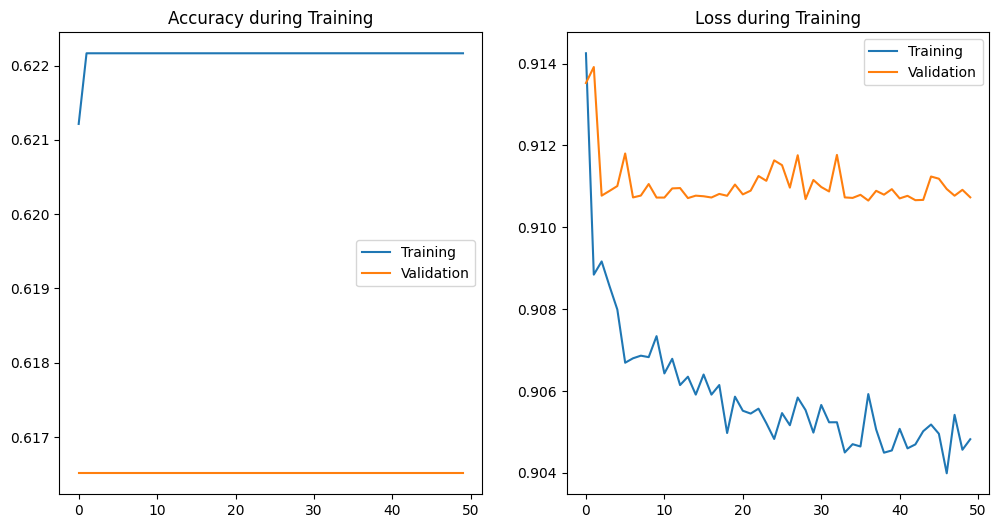

In [ ]:
## performance Visualization:
##Accuracy
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"],label="Training")
plt.plot(history.history["val_accuracy"],label="Validation")
plt.title("Accuracy during Training")
plt.legend()

##Loss
plt.subplot(1,2,2)
plt.plot(history.history["loss"],label="Training")
plt.plot(history.history["val_loss"],label="Validation")
plt.title("Loss during Training")
plt.legend()
plt.show()

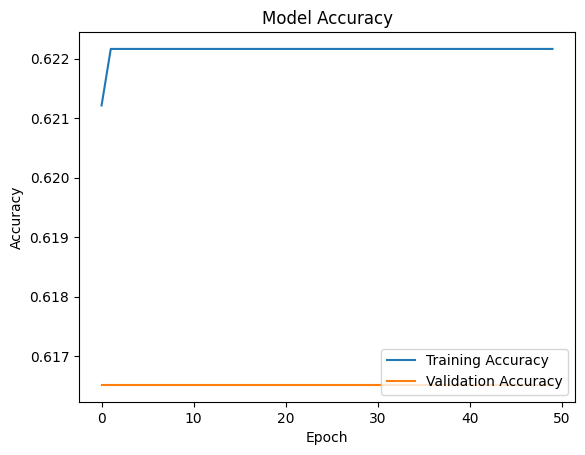

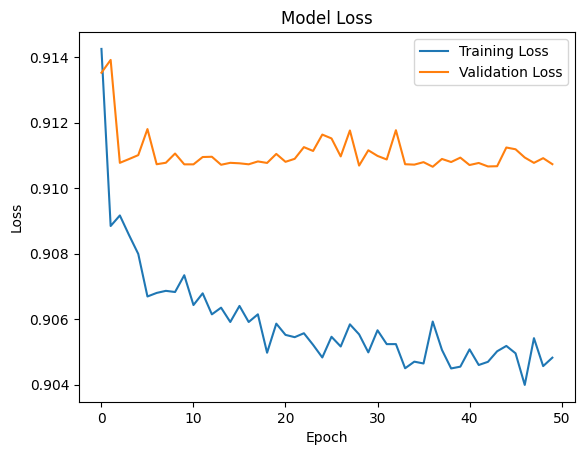

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()